<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

### Initial exploring
First let's take this dataset and do some initial exploring such as looking at the different columns and their datatype, looking at the header, evaluating the dimensions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pok = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
## What is a quick way to get some information on the dataset such as datatype and dimension?
pok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
## Missing data. While there does not seem to be any missing data, what is a way you can check if there any missing values in the dataset?
pok.isnull().sum()
## How would you handle them?
pok_nona =pok.dropna()
pok_nona

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Let's practice some basic data exploration
Answer the following questions below

In [13]:
## How many Pokémon are there in total?
len(pok_nona)

414

In [17]:
## What is the average HP (Hit Points) of all Pokémon?
hp_avg =pok_nona['HP'].mean()
float(hp_avg)

70.64975845410628

In [20]:
## Which Pokémon has the highest Attack stat?
attack_sort = pok_nona.sort_values(by='Attack', ascending= False)
highest_attack = attack_sort.iloc[0]
print(highest_attack)

#                             150
Name          MewtwoMega Mewtwo X
Type 1                    Psychic
Type 2                   Fighting
Total                         780
HP                            106
Attack                        190
Defense                       100
Sp. Atk                       154
Sp. Def                       100
Speed                         130
Generation                      1
Legendary                    True
Name: 163, dtype: object


In [22]:
## Find the strongest Pokémon based on their Total stat (sum of all base stats).
total_sort = pok_nona.sort_values(by='Total', ascending= False)
strongest_found = total_sort.iloc[0]
print(strongest_found)

#                               384
Name          RayquazaMega Rayquaza
Type 1                       Dragon
Type 2                       Flying
Total                           780
HP                              105
Attack                          180
Defense                         100
Sp. Atk                         180
Sp. Def                         100
Speed                           115
Generation                        3
Legendary                      True
Name: 426, dtype: object


In [24]:
## What are the top 5 Pokémon with the highest total stats?
strongest_found_5 = total_sort.iloc[:5]
print(strongest_found_5)

       #                   Name   Type 1    Type 2  Total   HP  Attack  \
426  384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
424  383  GroudonPrimal Groudon   Ground      Fire    770  100     180   
711  646     KyuremBlack Kyurem   Dragon       Ice    700  125     170   
796  719    DiancieMega Diancie     Rock     Fairy    700   50     160   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      100      180      100    115           3       True  
163      100      154      100    130           1       True  
424      160      150       90     90           3       True  
711      100      120       90     95           5       True  
796      110      160      110    110           6       True  


In [58]:
## Q: Which Pokémon types are most common across the Type I?
type_1_count = pok_nona['Type 1'].value_counts()
type_1_count

,count
Type 1,
Water,53
Bug,52
Normal,37
Grass,37
Rock,35
Fire,24
Ghost,22
Steel,22
Dragon,21


In [32]:
## Are there any Pokémon that have both 'Type 1' and 'Type 2' being the same? How do you filter them?
t1_t2_same = pok_nona[pok_nona['Type 1'] == pok_nona['Type 2']]
t1_t2_same

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


## How can we do further exploration and data manipulation?

In [56]:
## How would you categorize Pokémon based on their 'Speed' stat? (Consider creating a 'Speed category' column, where you have speed=0-50 is slow, speed=51-100 is average, and speed>101 is fast)
pok_nona_str['Speed'] = pok_nona['Speed'].astype(str)

conditions = [
    (pok_nona_str['Speed'] <= 50),
    (pok_nona_str['Speed'] > 50) & (pok_nona_str['Speed'] <= 100),
    (pok_nona_str['Speed'] > 100)
]
pok_nona_str['Speed category'] = np.select(conditions, categories)
print(pok_nona_str)

TypeError: '<=' not supported between instances of 'str' and 'int'

## Now let's practice with some plotting.

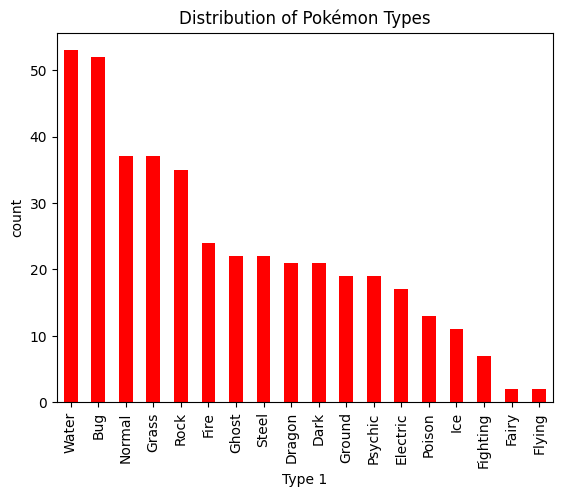

In [64]:
## What is the distribution of Pokémon by their primary type ('Type 1')? (Visualize this)
import matplotlib.pyplot as plt

type_1_count.plot(kind='bar', color='red')

plt.title('Distribution of Pokémon Types')
plt.xlabel('Type 1')
plt.ylabel('count')
plt.show()

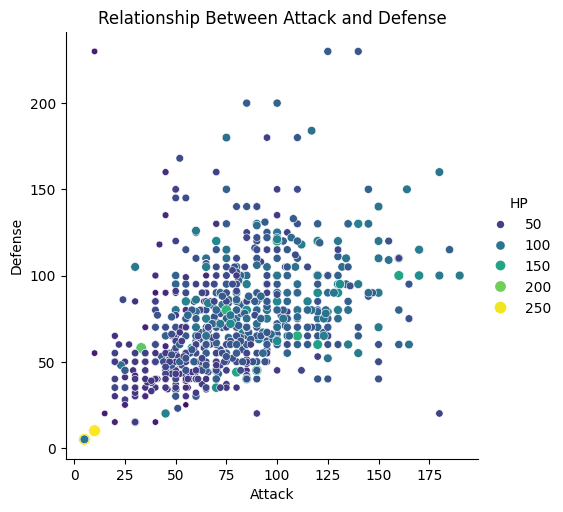

In [67]:
## Plot the relationship between Attack and Defense
## Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint.
relplot = sns.relplot(
    data=pok,
    x='Attack',
    y='Defense',
    hue = 'HP',
    palette = 'viridis',
    size = 'HP'
)
relplot.set(title='Relationship Between Attack and Defense',
            xlabel='Attack',
            ylabel='Defense')
plt.show()

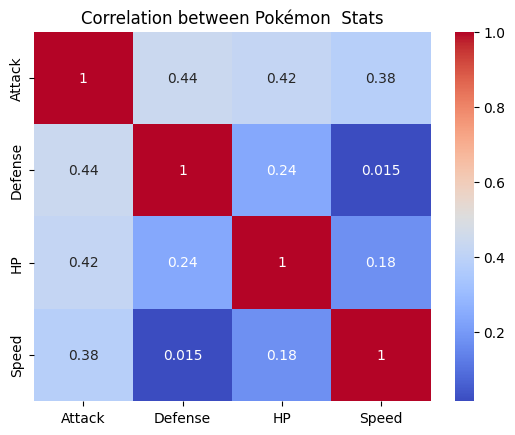

In [69]:
## What is the correlation between the various base stats (e.g., Attack vs. Defense)? Visualize this correlation.
## You can use a heatmap to visualize this sns.heatmap
correlation_calc = pok[['Attack', 'Defense', 'HP', 'Speed']].corr()
sns.heatmap(correlation_calc, annot=True, cmap='coolwarm')
plt.title('Correlation between Pokémon  Stats')
plt.show()


From the plot, I observed....
that there is little to no correlation between the stats

<ipython-input-75-75e83479cafe>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  relplot = sns.relplot(


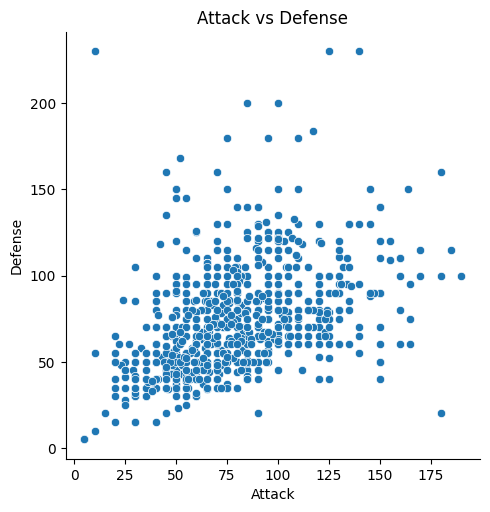

In [75]:
## What is the relationship between 'Attack' and 'Defense'? Are there any Pokémon with unusually high or low values?
## You can use a relplot or scatterplot (sns)
relplot = sns.relplot(
    data=pok,
    x='Attack',
    y='Defense',
    palette = 'viridis',
)
relplot.set(title='Attack vs Defense',
            xlabel='Attack',
            ylabel='Defense')
plt.show()